# Linear Regression

Linear regression is one of the most fundamental and widely used statistical techniques in data science. It models the relationship between a dependent variable and one or more independent variables by fitting a linear equation to observed data. We will explore the simple version on this notebook.

Furthermore, we will dive into concepts such as:

- The mathematical foundations of linear regression
- How to implement it using statsmodels
- Interpretation of results
- Key concepts like OLS, R-squared, and variability decomposition
- Practical applications with real-world datasets

## Index

1. [**Linear Regression Model**](#the-linear-regression-model)


**Libraries used:**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.datasets import fetch_california_housing
import pandas as pd
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor

## The Linear Regression Model

Linear regression models the relationship between a dependent variable ($Y$) and one or more independent variables ($X$) by fitting a linear equation to the observed data.

The simple linear regression model can be represented as:

$$
Y = \beta_0 + \beta_1X + \epsilon
$$

where $Y$ is the dependent variable, $X$ is the independent variable, $\beta_0$ is the y-intercept, $\beta_1$ is the slope coefficient and $\epsilon$ is the error term (residuals). Below we generate a random example set of data and plot it.

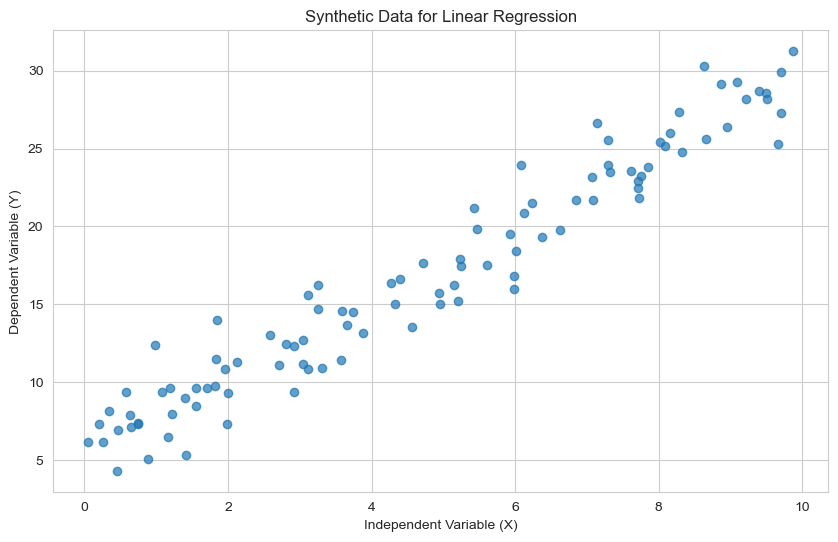

In [3]:
# Set style for plots
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# Generate some synthetic data
np.random.seed(42)
X = np.random.rand(100) * 10
true_slope = 2.5
true_intercept = 5
Y = true_intercept + true_slope * X + np.random.normal(0, 2, 100)

# Plot the data
plt.scatter(X, Y, alpha=0.7)
plt.xlabel('Independent Variable (X)')
plt.ylabel('Dependent Variable (Y)')
plt.title('Synthetic Data for Linear Regression')
plt.show()

## Correlation vs Regression

**Correlation** measures the strength and direction of the linear relationship between two variables, ranging from -1 to 1.

**Regression** quantifies how the dependent variable changes as the independent variable(s) change, providing a predictive model.

In sum, the key differences are:

- Correlation is symmetric (corr(X,Y) = corr(Y,X)), regression is not;

- Regression implies a causal relationship (X affects Y), correlation does not;

- Regression provides coefficients that can predict Y from X

In [4]:
# Calculate correlation
correlation = np.corrcoef(X, Y)[0, 1]
print(f"Correlation coefficient: {correlation:.3f}")

# Simple linear regression
X_with_const = sm.add_constant(X)  # Adds a constant term for the intercept
model = sm.OLS(Y, X_with_const)
results = model.fit()

print("\nRegression results:")
print(results.summary())

Correlation coefficient: 0.970

Regression results:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     1543.
Date:                Tue, 15 Apr 2025   Prob (F-statistic):           8.82e-62
Time:                        18:42:51   Log-Likelihood:                -200.46
No. Observations:                 100   AIC:                             404.9
Df Residuals:                      98   BIC:                             410.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
